## Simple Dask Client Demo

### Simple Code

In [1]:
from time import sleep

def inc(x):
    sleep(1)
    return x + 1

def add(x, y):
    sleep(1)
    return x + y

In [2]:
%%time
# This takes three seconds to run because we call each
# function sequentially, one after the other

x = inc(1)
y = inc(2)
z = add(x, y)

CPU times: user 1.76 ms, sys: 300 µs, total: 2.06 ms
Wall time: 3 s


### Parallelize with the <i><small>dask.delayed</small></i> decorator

In [4]:
from dask import delayed
from dask.distributed import Client

client = Client("172.24.201.182:8786")

In [5]:
%%time
# This runs immediately, all it does is build a graph

x = delayed(inc)(1)
y = delayed(inc)(2)
z = delayed(add)(x, y)

CPU times: user 1.11 ms, sys: 613 µs, total: 1.73 ms
Wall time: 1.03 ms


### Compute the real value

In [6]:
%%time
# This actually runs our computation using a local thread pool

z.compute()

CPU times: user 78 ms, sys: 7.95 ms, total: 86 ms
Wall time: 2.09 s


5

### Type Delayed

In [7]:
z

Delayed('add-791d369f-bb6f-4fc2-afec-46e73ccb16c1')

### View the exec plan

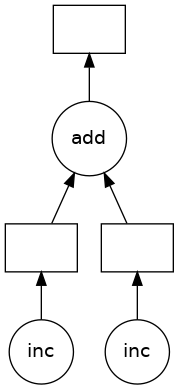

In [9]:
# Look at the task graph for `z`
z.visualize()

### Parallelize a for loop

In [10]:
# Data 
data = [1, 2, 3, 4, 5, 6, 7, 8]

In [11]:
%%time
# Sequential code

results = []
for x in data:
    y = inc(x)
    results.append(y)

total = sum(results)

CPU times: user 11 ms, sys: 2.92 ms, total: 13.9 ms
Wall time: 8.01 s


In [12]:
# Get Total value
total

44

In [13]:
%%time
# Parallel code
results = []

for x in data:
    y = delayed(inc)(x)
    results.append(y)

total = delayed(sum)(results)
print("Before computing:", total)  # Let's see what type of thing total is
result = total.compute()
print("After computing :", result)  # After it's computed

Before computing: Delayed('sum-cca6eeec-1330-4691-aa31-1353014d5f51')
After computing : 44
CPU times: user 15.5 ms, sys: 0 ns, total: 15.5 ms
Wall time: 1.03 s


In [14]:
# Delayed 
total

Delayed('sum-cca6eeec-1330-4691-aa31-1353014d5f51')

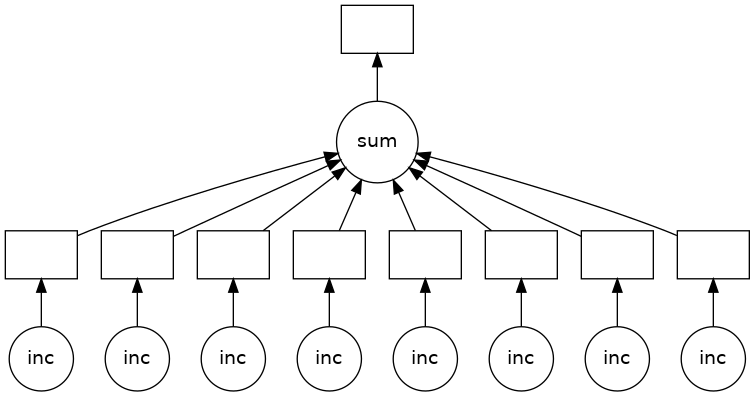

In [15]:
# Look at the task graph for `total`
total.visualize()

### Parallelize a for loop with control flow

In [16]:
def double(x):
    sleep(1)
    return 2 * x

def is_even(x):
    return not x % 2

data = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]


In [17]:
%%time
# Sequential code

results = []
for x in data:
    if is_even(x):
        y = double(x)
    else:
        y = inc(x)
    results.append(y)

total = sum(results)
print(total)

90
CPU times: user 11.9 ms, sys: 3.15 ms, total: 15 ms
Wall time: 10 s


In [18]:
%%time
results = []
for x in data:
    if is_even(x):  # even
        y = delayed(double)(x)
    else:          # odd
        y = delayed(inc)(x)
    results.append(y)

total = delayed(sum)(results)

CPU times: user 5.14 ms, sys: 1.38 ms, total: 6.53 ms
Wall time: 3.13 ms


In [19]:
%time total.compute()

CPU times: user 12.8 ms, sys: 0 ns, total: 12.8 ms
Wall time: 1.03 s


90

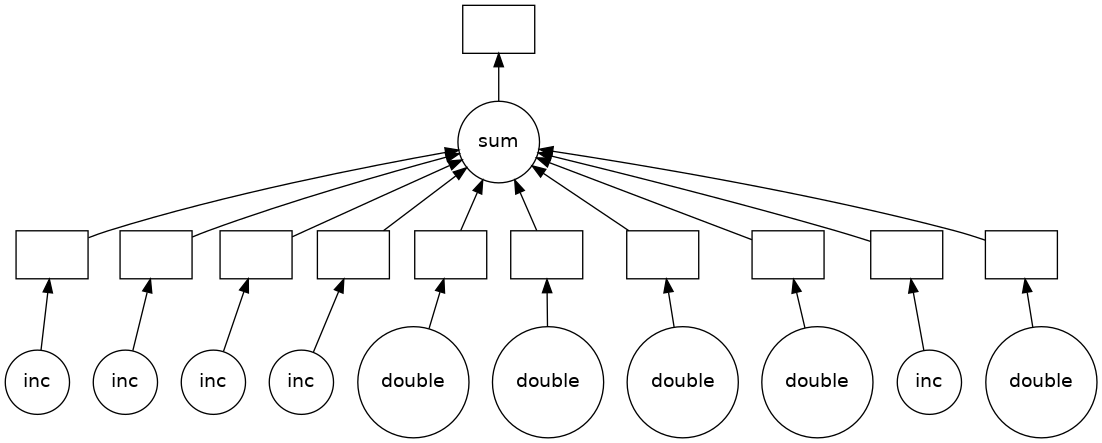

In [20]:
total.visualize()